In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Dataset: https://archive.ics.uci.edu/ml/datasets/banknote+authentication
data = np.genfromtxt ('data_banknote_authentication.csv', delimiter=",")
X = data[:,:-1]
y = data[:,-1].astype(np.int64)
X.shape

(1372, 4)

In [3]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,train_size = 0.8, shuffle = True)

In [4]:
stdsc = StandardScaler()
stdsc.fit(X_train)
X_train_ss = stdsc.transform(X_train)
X_test_ss = stdsc.transform(X_test)

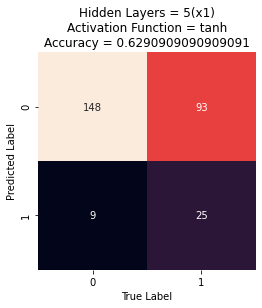

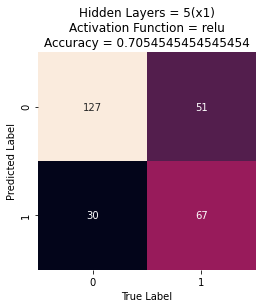

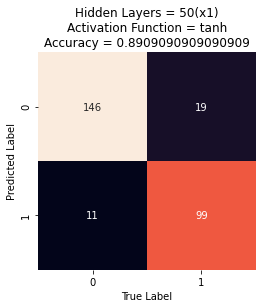

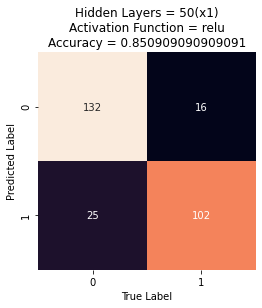

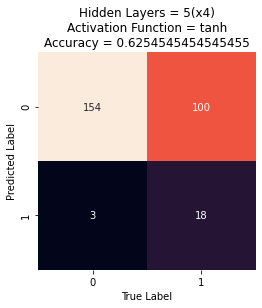

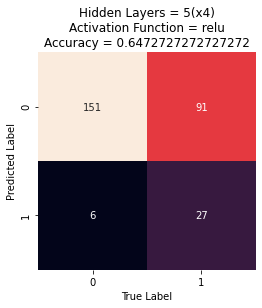

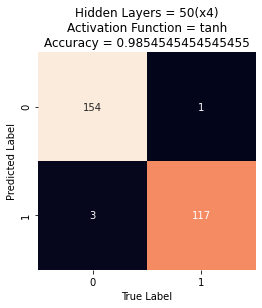

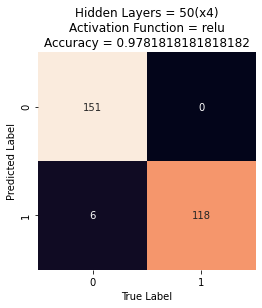

In [5]:
hidden_layers = [1,4]
num_neurons = [5,50]
activation_funcs = ['tanh','relu']
batchs = 200
maxiter = 10
models = []
hyperparams = []
for hidden in hidden_layers:
    for neurons in num_neurons:
        layer_list = [neurons] * hidden
        for func in activation_funcs:
            hyperparams.append([layer_list,func])
            models.append(MLPClassifier(activation=func,random_state=1, \
            hidden_layer_sizes=layer_list,max_iter=maxiter,batch_size=batchs))

model_conf = []
for ind,model in enumerate(models):
    model.fit(X_train_ss, y_train)
    conf_mat = confusion_matrix(y_test,model.predict(X_test_ss))
    model_conf.append(conf_mat)
    tit_str1 = f'Hidden Layers = {hyperparams[ind][0][0]}(x{len(hyperparams[ind][0])})\n'
    tit_str2 = f'Activation Function = {hyperparams[ind][1]}\n'
    tit_str3 = f'Accuracy = {model.score(X_test_ss, y_test)}'
    tit_str = tit_str1 + tit_str2 + tit_str3
    myax = sns.heatmap(conf_mat.T, square = True, annot = True, fmt = 'd', \
    cbar = False).set(title=tit_str,xlabel='True Label', ylabel='Predicted Label')
    plt.show()

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# Dataset: https://archive.ics.uci.edu/ml/datasets/banknote+authentication
data = np.genfromtxt ('data_banknote_authentication.csv', delimiter=",")
X = data[:,:-1]
y = data[:,-1].astype(np.int64)

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,train_size = 0.8, shuffle = True)

In [9]:
stdsc = StandardScaler()
stdsc.fit(X_train)
X_train_ss = stdsc.transform(X_train)
X_test_ss = stdsc.transform(X_test)

In [10]:
layer_size = 10
num_layers = 2
hidden_layers = [layer_size] * num_layers
activation_func = 'tanh'
batchs = 50
start_epoch = 10
inc_epoch = 1
fin_epoch = 70
ran_epoch = np.arange(start_epoch,fin_epoch,inc_epoch)

train_per = [1/4,1/2,3/4,1]
trainnum = []

for percent in train_per:
    acc_epoch = []
    X_trainmod,X_dum,y_trainmod,y_dum = train_test_split(X_train_ss,y_train,random_state=1,train_size = percent)
    if (percent == 1):
        X_trainmod = X_train_ss
        y_trainmod = y_train
    for cepoch in range(start_epoch,fin_epoch,inc_epoch):
        mlpclass = MLPClassifier(activation=activation_func,random_state=1, hidden_layer_sizes=hidden_layers,max_iter=cepoch,batch_size=batchs)
        mlpclass.fit(X_trainmod, y_trainmod)
        #print(X_test_ss.shape,y_test.shape)
        acc_epoch.append(mlpclass.score(X_test_ss, y_test))
    trainnum.append(acc_epoch)

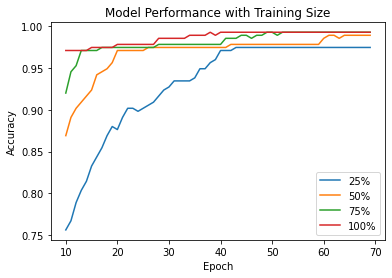

In [11]:
plt.figure()
plt.plot(ran_epoch,trainnum[0],label='25%')
plt.plot(ran_epoch,trainnum[1],label='50%')
plt.plot(ran_epoch,trainnum[2],label='75%')
plt.plot(ran_epoch,trainnum[3],label='100%')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Performance with Training Size')
plt.legend()
plt.show()